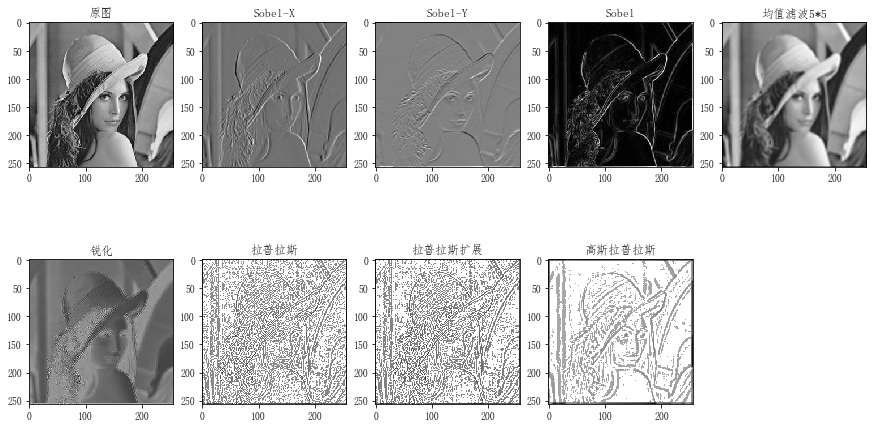

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.signal as ss

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

# def imConv(image_array,suanzi, kernelDim):
#     image = image_array.copy()
#     dim1,dim2 = image.shape
#     newImageDelta = int((kernelDim - 1)/2)
#     for i in range(newImageDelta,dim1-newImageDelta):
#         for j in range(newImageDelta,dim2-newImageDelta):
#             image[i,j] = (image_array[(i-newImageDelta):(i+newImageDelta+1),(j-newImageDelta):(j+newImageDelta+1)]*suanzi).sum()
# 
#     image = image*(255.0/image.max())
# 
#     return image

image_BGR = cv2.imread('images/12/Lena.png')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
image_Gray = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(15,8), facecolor='w')
plt.subplot(251)
plt.title('原图')
plt.imshow(image_Gray, cmap='gray')

plt.subplot(252)
plt.title('Sobel-X')
SobelX = np.array([[-1, 0, 1],
                     [ -2, 0, 2],
                     [ -1, 0, 1]])
image_x = ss.convolve2d(image_Gray, SobelX, mode="same")# imConv(image_Gray, suanzi_x,3)
plt.imshow(image_x, cmap='gray')

plt.subplot(253)
plt.title('Sobel-Y')
SobelY = np.array([[-1,-2,-1],
                     [ 0, 0, 0],
                     [ 1, 2, 1]])
image_y = ss.convolve2d(image_Gray, SobelY, mode="same")
plt.imshow(image_y, cmap='gray')

plt.subplot(254)
# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy

plt.title('Sobel')
plt.imshow(image_xy, cmap='gray')

plt.subplot(255)
plt.title('均值滤波5*5')
mean = np.ones((5,5), np.float32) / (5 * 5)
plt.imshow(ss.convolve2d(image_Gray, mean, mode="same"), cmap='gray')

plt.subplot(256)
RuiHua = np.array([[0,-1,0],
                   [ -1, 3, -1],
                   [0, -1, 0]])
plt.title('锐化')
plt.imshow(ss.convolve2d(image_Gray, RuiHua, mode="same"), cmap='gray')

plt.subplot(257)
Laplace = np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
plt.title('拉普拉斯')
laplaceImage = ss.convolve2d(image_Gray, Laplace, mode="same")
laplaceImage = (laplaceImage/float(laplaceImage.max())) * 255
laplaceImage[laplaceImage>laplaceImage.mean()] = 255
plt.imshow(laplaceImage, cmap='gray')

plt.subplot(258)
LaplaceEx = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])
plt.title('拉普拉斯扩展')
laplaceImageEx = ss.convolve2d(image_Gray, LaplaceEx, mode="same")
laplaceImageEx = (laplaceImageEx/float(laplaceImageEx.max())) * 255
laplaceImageEx[laplaceImageEx>laplaceImageEx.mean()] = 255
plt.imshow(laplaceImageEx, cmap='gray')

def func(x,y,sigma=1):
    return 100*(1/(2*np.pi*sigma))*np.exp(-((x-2)**2+(y-2)**2)/(2.0*sigma**2))

GaussBlur = np.fromfunction(func,(5,5),sigma=5)
gaussBlurImage = ss.convolve2d(image_Gray, GaussBlur, mode="same")
gaussLaplaceImage = ss.convolve2d(gaussBlurImage, LaplaceEx, mode="same")
gaussLaplaceImage = (gaussLaplaceImage/float(gaussLaplaceImage.max())) * 255
gaussLaplaceImage[gaussLaplaceImage>gaussLaplaceImage.mean()] = 255
plt.subplot(259)
plt.imshow(gaussLaplaceImage, cmap='gray')
plt.title('高斯拉普拉斯')
plt.show()